In [1]:
from setup_env import setup_environment

setup_environment()

In [2]:
from project.wfc.factory import Factory
from project.wfc.grid import Grid, Rect
from project.visualization.grid_renderer import grid_renderer
from project.config import DATA_SOURCE
from project.wfc.repository import repository
from project.wfc.wfc import WFC
from project.wfc.judge import RandomJudge
from project.visualization.grid_renderer import TextToShow

In [7]:
factory = Factory(DATA_SOURCE)

patterns = factory.create_patterns()

rect = Rect(width=10, height=10)

grid = Grid(rect=rect, patterns=repository.get_all_patterns())

judge = RandomJudge()

wfc = WFC(grid=grid, judge=judge)

INFO - Validation Result: success



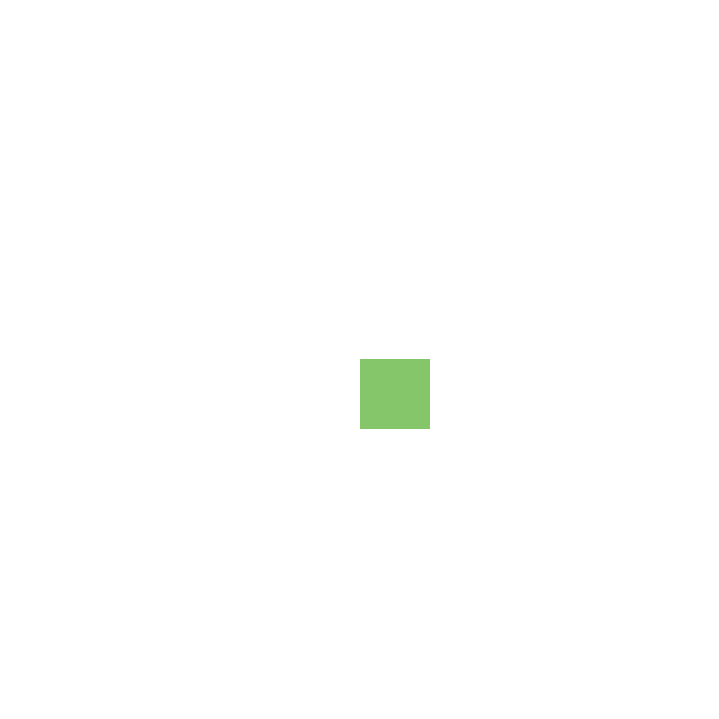

In [8]:
if wfc.step(early_stopping=True).success:
    grid_renderer.draw(grid=grid, show_borders=False, seed=100, show=True)

In [9]:
TARGET = 1
tries = 0

for _ in range(TARGET):
    is_succeeded = False
    tries = 0
    while is_succeeded != True:
        tries += 1
        is_succeeded = wfc.generate()
    # wfc.grid.serialize("data/grids/wfc/test/")

tries

32

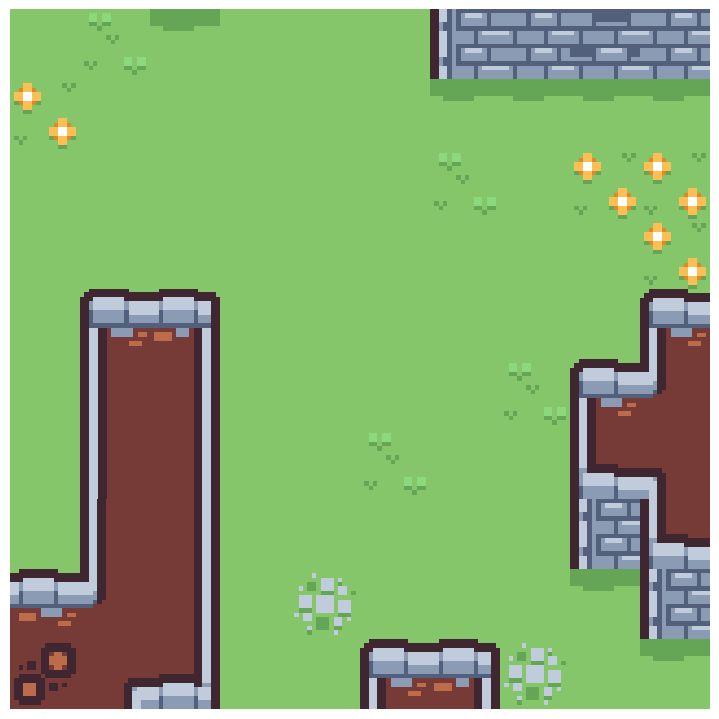

In [10]:
grid_renderer.draw(
    grid=grid,
    show_borders=False,
    seed=42,
    show_image=True,
    text_to_show=TextToShow.HEIGHT,
)